Twitter Sentiment Analysis

1. Importing Libraries

In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2. Loading the dataset

In [4]:
#Reading the CSV Files
data = pd.read_csv('twitter_training.csv')

3. Initial Inspection 

In [5]:
#Retrieving the first 5 rows of the dataset
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
#Retrieving the last 5 rows of the dataset
data.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [7]:
#Renaming the column headings
data.columns = ['id', 'company', 'sentiment', 'text']
data.head()

,id,company,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
#Determining the number of rows and columns in the dataset
data.shape

(74681, 4)

In [9]:
#Retrieving the column names
data.columns

Index(['id', 'company', 'sentiment', 'text'], dtype='object')

In [10]:
#Retrieving the information of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   company    74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [11]:
#Retrieving the datatypes of columns
data.dtypes

id            int64
company      object
sentiment    object
text         object
dtype: object

4. Data Cleaning

In [12]:
#Checking the null values
data.isnull().sum()

id             0
company        0
sentiment      0
text         686
dtype: int64

In [13]:
#Here we get 686 null values in text column
#Checking the null values in percentage
(data.isnull().sum()/(len(data)))*100

id           0.000000
company      0.000000
sentiment    0.000000
text         0.918574
dtype: float64

In [14]:
#Here for the text column, the missing values percentage is 0.918%
#Removing such rows
data.dropna(axis = 0, inplace = True)
data.isnull().sum()

id           0
company      0
sentiment    0
text         0
dtype: int64

In [15]:
#Checking the duplicate values
data.duplicated().sum()

2340

In [16]:
#Here we get 2340 duplicate values 
#Checking the duplicate values in percentage
(data.duplicated().sum()/(len(data)))*100

3.1623758362051486

In [17]:
#Here the duplicated values percentage is 3.162%
#Removing such rows
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

5. Univariate Analysis

In [18]:
#Describing the dataset
data.describe(include = "all")

,id,company,sentiment,text
count,71655.000000,71655,71655,71655
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,It is not the first time that the EU Commissio...
freq,NaN,2328,21698,172
mean,6436.493559,NaN,NaN,NaN
std,3742.287116,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3199.000000,NaN,NaN,NaN
50%,6433.000000,NaN,NaN,NaN
75%,9604.000000,NaN,NaN,NaN


In [19]:
#Getting categorical and numerical variables
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['company', 'sentiment', 'text'], dtype='object')
Numerical Variables:
['id']


In [20]:
#Retrieving the count of different id
id_types = data['id'].value_counts()
id_types

id
5203    6
5829    6
5743    6
5744    6
5745    6
       ..
9681    2
4050    2
8519    2
1094    2
4463    2
Name: count, Length: 12447, dtype: int64

C:\Users\aksha\AppData\Local\Temp\ipykernel_16092\3770551422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=id_types.index, x=id_types.values, palette = ['#1f77b4', '#ff7f0e'])
C:\Users\aksha\AppData\Local\Temp\ipykernel_16092\3770551422.py:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(y=id_types.index, x=id_types.values, palette = ['#1f77b4', '#ff7f0e'])


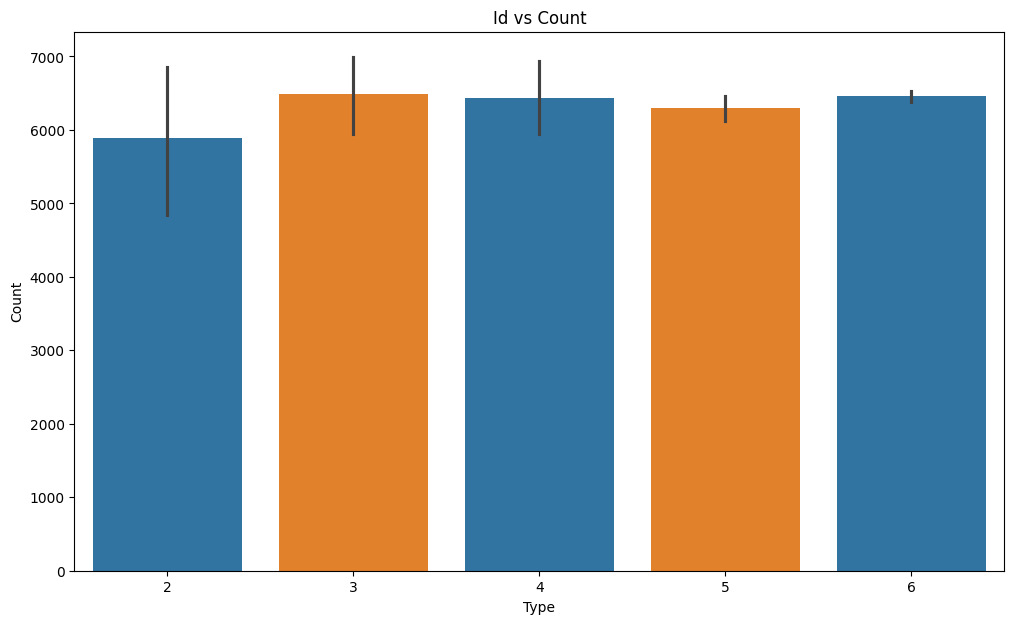

In [21]:
#Plotting a bar graph between Ids and their Count
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values, palette = ['#1f77b4', '#ff7f0e'])  
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Id vs Count')
plt.show()

In [22]:
#Retrieving the count of different companies
company_types = data['company'].value_counts()
company_types

company
TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2205
Xbox(Xseries)                        2201
Google                    

C:\Users\aksha\AppData\Local\Temp\ipykernel_16092\48504512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_types.values,y=company_types.index, palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
C:\Users\aksha\AppData\Local\Temp\ipykernel_16092\48504512.py:3: UserWarning: 
The palette list has fewer values (4) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=company_types.values,y=company_types.index, palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])


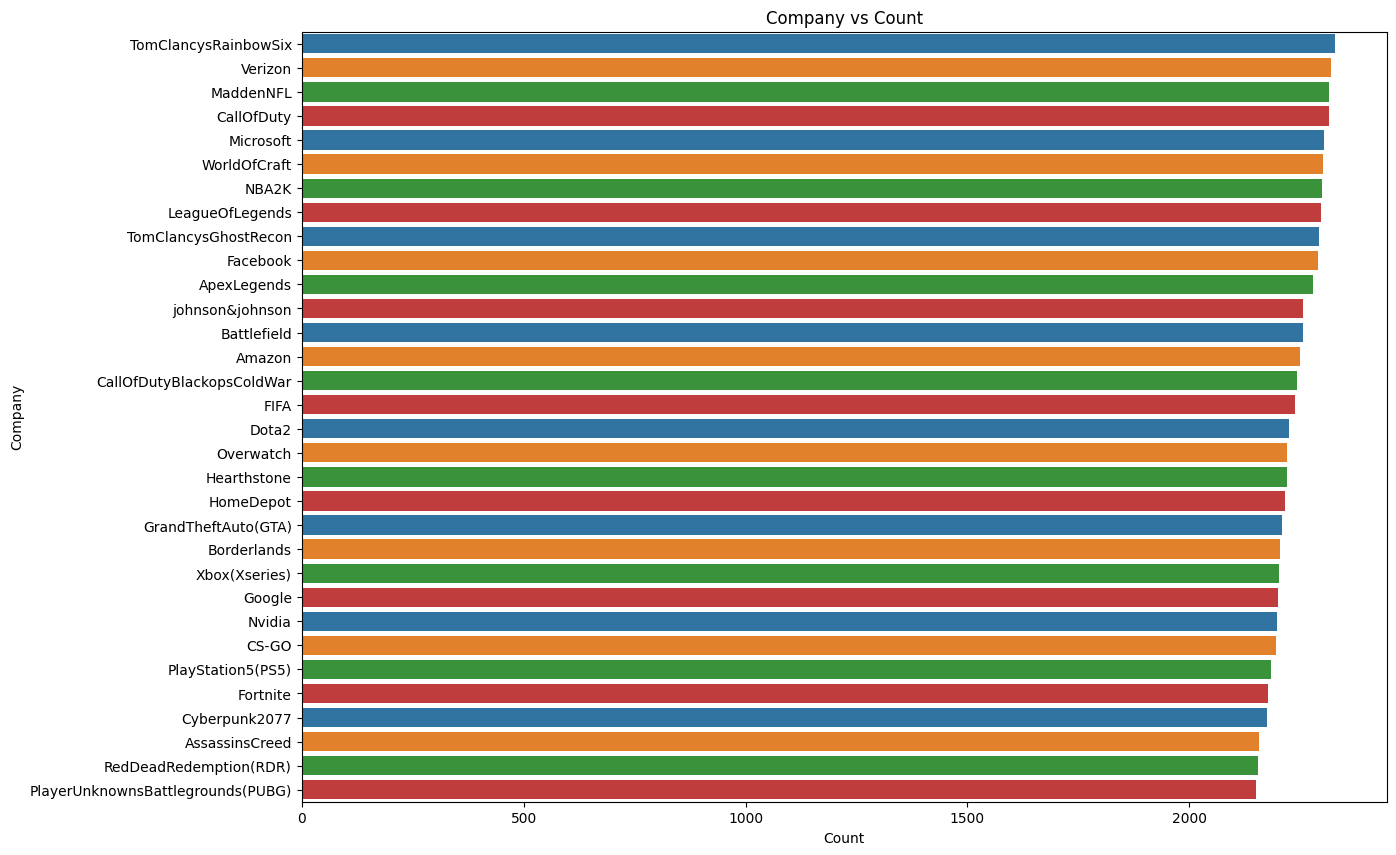

In [23]:
#Plotting a bar graph between Companies and their Count
plt.figure(figsize=(14,10))
sns.barplot(x=company_types.values,y=company_types.index, palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])  
plt.title('Company vs Count')
plt.ylabel('Company')
plt.xlabel('Count')
plt.show()

6. Bivariate Analysis

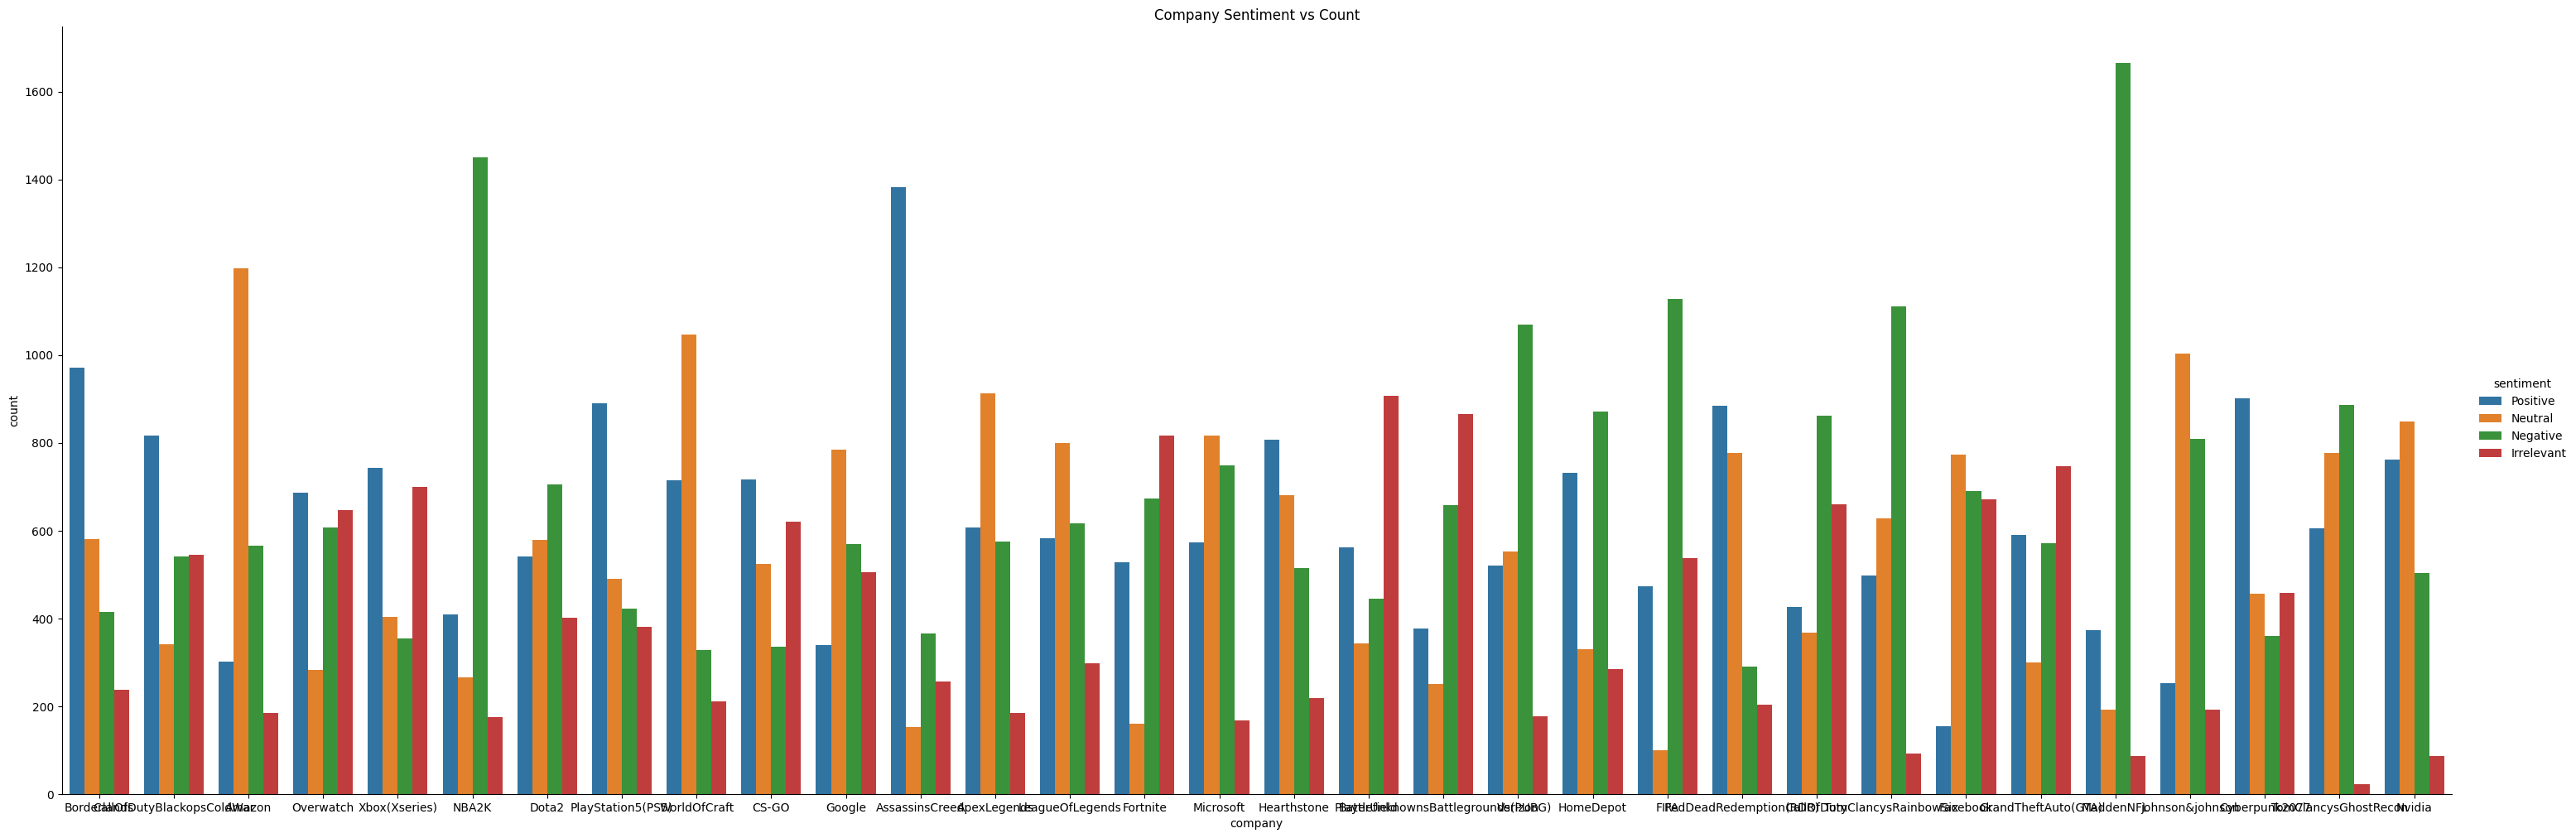

In [24]:
#Plotting a graph of different Sentiments for different Companies
sns.catplot(x="company",hue="sentiment", kind="count",height=10,aspect=3, data=data, palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Company Sentiment vs Count')
plt.show()

7. Visualisation

In [25]:
#Retrieving the count of different sentiments
sentiment_types = data['sentiment'].value_counts()
sentiment_types

sentiment
Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

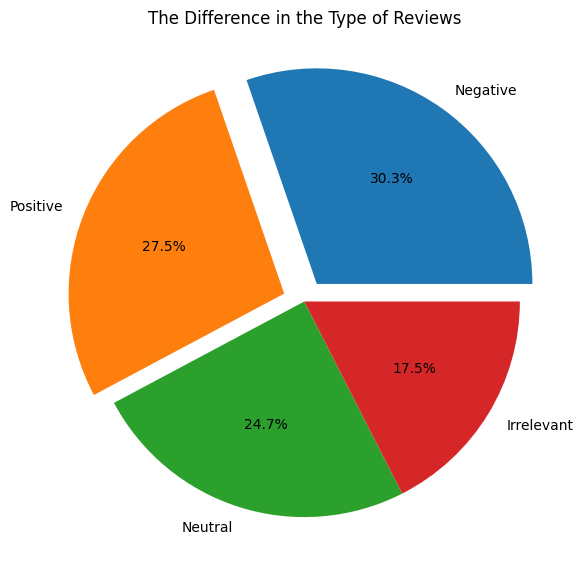

In [26]:
#Plotting a pie chart for showing difference in type of reviews
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Reviews')
plt.show()

Text(0.5, 0, 'IDs')

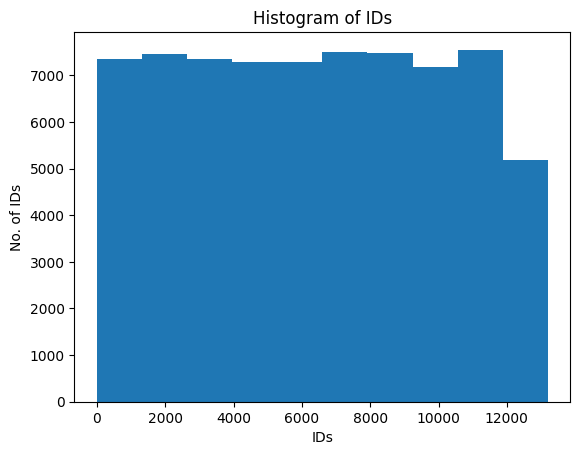

In [27]:
#Plotting a hisatogram for IDs
plt.hist(data['id'])
plt.title('Histogram of IDs')
plt.ylabel('No. of IDs')
plt.xlabel('IDs')

In [ ]:
#The above histogram confirms that id is almost evenly distributed in the dataset. 